# Notebook used in the calculation of the grid percentages

## Analysis on the intersections between grids and admin 3 boundaries


In [1]:
%load_ext jupyter_black
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path

pd.set_option("display.float_format", lambda x: "%.5f" % x)
input_dir = (
    Path(os.getenv("STORM_DATA_DIR"))
    / "analysis/02_new_model_input/02_housing_damage/input/"
)

Creating centroids

In [2]:
# reading in the intersections file
intersections_area = pd.read_csv(
    input_dir / "phl_adm3_grid_intersections_area.csv"
)
adm3_area = pd.read_csv(input_dir / "adm3_area.csv")

In [3]:
intersections_area.columns

Index(['Unnamed: 0', 'Shape_Leng', 'Shape_Area', 'ADM3_EN', 'ADM3_PCODE',
       'ADM3_REF', 'ADM3ALT1EN', 'ADM3ALT2EN', 'ADM2_EN', 'ADM2_PCODE',
       'ADM1_EN', 'ADM1_PCODE', 'ADM0_EN', 'ADM0_PCODE', 'date', 'validOn',
       'validTo', 'Area', 'id', 'Longitude', 'Latitude', 'Centroid', 'Area_2',
       'Shape_Leng_2', 'Shape_Area_2', 'ADM3_EN_2', 'ADM3_REF_2',
       'ADM3ALT1EN_2', 'ADM3ALT2EN_2', 'ADM2_EN_2', 'ADM2_PCODE_2',
       'ADM1_EN_2', 'ADM1_PCODE_2', 'ADM0_EN_2', 'ADM0_PCODE_2', 'date_2',
       'validOn_2', 'validTo_2', 'Longitude_3', 'Latitude_3', 'Centroid_3',
       'Area_3'],
      dtype='object')

In [4]:
# intersections_area["Longitude"] = (
#     intersections_area["left"] + intersections_area["right"]
# ) / 2
# intersections_area["Latitude"] = (
#     intersections_area["top"] + intersections_area["bottom"]
# ) / 2
intersections_area["lon_symb"] = [
    "W" if x < 0 else "E" for x in intersections_area["Longitude"]
]
intersections_area["lat_symb"] = [
    "S" if y < 0 else "N" for y in intersections_area["Latitude"]
]
intersections_area["Centroid"] = (
    intersections_area["Longitude"].round(1).astype(str)
    + intersections_area["lon_symb"]
    + "_"
    + intersections_area["Latitude"].round(1).astype(str)
    + intersections_area["lat_symb"]
)
# getting unique grid values
grid_area = intersections_area.drop_duplicates(subset=["id"])
# getting range of grid sizes
grid_area["AreainKM_2"] = grid_area["Area_2"] / 10**6
grid_area["AreainKM_2"].describe()

C:\Users\pauni\AppData\Local\Temp\ipykernel_48980\626327116.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grid_area["AreainKM_2"] = grid_area["Area_2"] / 10**6


count   3726.00000
mean     120.45706
std        1.59586
min      115.03743
25%      119.47715
50%      120.84797
75%      121.83542
max      122.70478
Name: AreainKM_2, dtype: float64

In [5]:
# getting range of municipality sizes
adm3_area["AreainKM"] = adm3_area["Area"] / 10**6
adm3_area["AreainKM"].describe()

count   1647.00000
mean     178.20355
std      205.85089
min        0.39981
25%       59.47570
50%      112.12283
75%      217.17893
max     2341.42597
Name: AreainKM, dtype: float64

Text(0.5, 1.0, 'Municipality Sizes in Square KM')

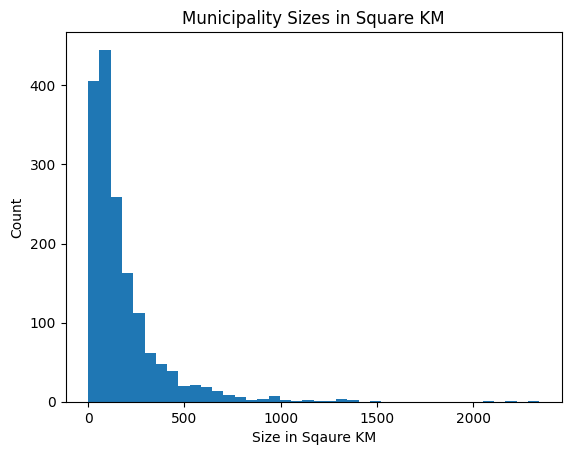

In [6]:
# histogram of municipality area
plt.hist(adm3_area["AreainKM"], bins=40)
plt.xlabel("Size in Sqaure KM")
plt.ylabel("Count")
plt.title("Municipality Sizes in Square KM")

In [7]:
# proportion of municipalities smaller than 120 sq KM
len(adm3_area["AreainKM"][(adm3_area["AreainKM"] <= 120)]) / len(
    adm3_area["AreainKM"]
)

0.5282331511839709

Around 52.8% of municipalities are smaller than 120 square kilmetres.

Text(0.5, 1.0, 'Number of Municipalities in a Grid')

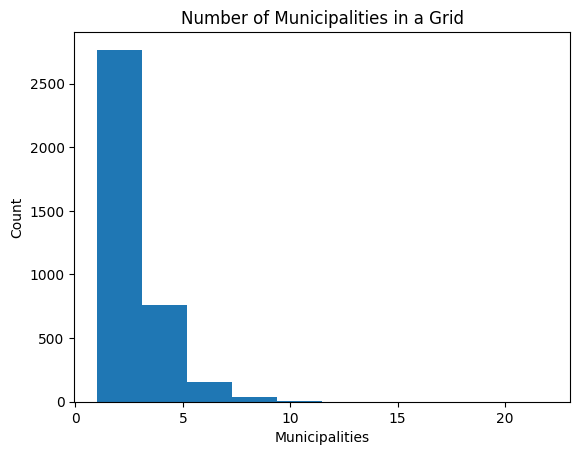

In [8]:
# number of municipalities in a grid
municip_no = intersections_area.groupby("id")["ADM3_PCODE"].count()
# municip_no.describe()
# histogram of number of municipalities in a grid
plt.hist(municip_no, bins=10)
plt.xlabel("Municipalities")
plt.ylabel("Count")
plt.title("Number of Municipalities in a Grid")

In [9]:
# assigning grids to municipalities based on which one has the largest area
max_area_grid_assignment = (
    intersections_area.sort_values("Area_3", ascending=False)
    .groupby("id", as_index=False)
    .first()
)
max_area_grid_assignment

,id,Unnamed: 0,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,...,ADM0_PCODE_2,date_2,validOn_2,validTo_2,Longitude_3,Latitude_3,Centroid_3,Area_3,lon_symb,lat_symb
0,101,4319,0.03108,0.00003,Kalayaan,PH175321000,None,NaN,NaN,Palawan,...,PH,2016-06-30,2020-05-29,NaN,114.30000,11.10000,114.3E_11.1N,399814.39589,E,N
1,4475,677,3.94618,0.04587,Balabac,PH175304000,None,NaN,NaN,Palawan,...,PH,2016-06-30,2020-05-29,NaN,116.90000,7.90000,116.9E_7.9N,3650838.06545,E,N
2,4639,678,3.94618,0.04587,Balabac,PH175304000,None,NaN,NaN,Palawan,...,PH,2016-06-30,2020-05-29,NaN,117.00000,8.20000,117.0E_8.2N,705653.30235,E,N
3,4640,679,3.94618,0.04587,Balabac,PH175304000,None,NaN,NaN,Palawan,...,PH,2016-06-30,2020-05-29,NaN,117.00000,8.10000,117.0E_8.1N,40340442.66503,E,N
4,4641,680,3.94618,0.04587,Balabac,PH175304000,None,NaN,NaN,Palawan,...,PH,2016-06-30,2020-05-29,NaN,117.00000,8.00000,117.0E_8.0N,100618660.83067,E,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,20677,613,1.52296,0.07267,Baganga,PH112501000,None,NaN,NaN,Davao Oriental,...,PH,2016-06-30,2020-05-29,NaN,126.60000,7.60000,126.6E_7.6N,19211303.58836,E,N
3722,20678,614,1.52296,0.07267,Baganga,PH112501000,None,NaN,NaN,Davao Oriental,...,PH,2016-06-30,2020-05-29,NaN,126.60000,7.50000,126.6E_7.5N,54621043.75488,E,N
3723,20679,1959,1.11759,0.04675,Caraga,PH112504000,None,NaN,NaN,Davao Oriental,...,PH,2016-06-30,2020-05-29,NaN,126.60000,7.40000,126.6E_7.4N,8014208.60482,E,N
3724,20680,1960,1.11759,0.04675,Caraga,PH112504000,None,NaN,NaN,Davao Oriental,...,PH,2016-06-30,2020-05-29,NaN,126.60000,7.30000,126.6E_7.3N,23021426.19234,E,N


In [10]:
# assignment rate
len(max_area_grid_assignment["ADM3_PCODE"].unique()) / len(
    intersections_area["ADM3_PCODE"].unique()
)

0.8093503339404978

Around 19% of municipalities do not contribute to grids.

In [ ]:
# writing matching to file
max_assign_out = max_area_grid_assignment[
    ["id", "Centroid", "ADM3_PCODE", "ADM3_EN"]
]
max_assign_out.to_csv(input_dir / "Grid_Matching_Adm3_Max.csv", index=False)

In [11]:
# creating matrix with weights for each grid
intersections_area["Complete Grid"] = [
    1 if (y - x) <= 100 else 0
    for (y, x) in zip(
        intersections_area["Area_2"], intersections_area["Area_3"]
    )
]
intersections_area["Complete Grid"].describe()

count   9887.00000
mean       0.01011
std        0.10007
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max        1.00000
Name: Complete Grid, dtype: float64

In [12]:
intersections_area["Grid Completeness"] = (
    intersections_area["Area_3"] / intersections_area["Area_2"]
)
intersections_area["Municipality Completeness"] = (
    intersections_area["Area_3"] / intersections_area["Area"]
)
intersections_area[intersections_area["id"] == 10569]

,Unnamed: 0,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,...,validTo_2,Longitude_3,Latitude_3,Centroid_3,Area_3,lon_symb,lat_symb,Complete Grid,Grid Completeness,Municipality Completeness
647,647,0.32395,0.00491,Baguio City,PH141102000,NaN,NaN,NaN,Benguet,PH141100000,...,NaN,120.60000,16.40000,120.6E_16.4N,57429698.75315,E,N,0,0.48583,0.98870
4096,4096,0.89318,0.03705,Itogon,PH141106000,NaN,NaN,NaN,Benguet,PH141100000,...,NaN,120.60000,16.40000,120.6E_16.4N,17092920.32518,E,N,0,0.14460,0.03901
4537,4537,0.35683,0.00596,La Trinidad,PH141110000,NaN,NaN,NaN,Benguet,PH141100000,...,NaN,120.60000,16.40000,120.6E_16.4N,20771219.60269,E,N,0,0.17572,0.29496
9545,9545,0.91203,0.02892,Tuba,PH141113000,NaN,NaN,NaN,Benguet,PH141100000,...,NaN,120.60000,16.40000,120.6E_16.4N,22914926.66490,E,N,0,0.19385,0.06701


In [13]:
intersections_area[intersections_area["ADM3_PCODE"] == "PH141102000"]

,Unnamed: 0,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,...,validTo_2,Longitude_3,Latitude_3,Centroid_3,Area_3,lon_symb,lat_symb,Complete Grid,Grid Completeness,Municipality Completeness
646,646,0.32395,0.00491,Baguio City,PH141102000,NaN,NaN,NaN,Benguet,PH141100000,...,NaN,120.50000,16.40000,120.5E_16.4N,656126.31062,E,N,0,0.00555,0.01130
647,647,0.32395,0.00491,Baguio City,PH141102000,NaN,NaN,NaN,Benguet,PH141100000,...,NaN,120.60000,16.40000,120.6E_16.4N,57429698.75315,E,N,0,0.48583,0.98870


In [14]:
intersections_area[
    ["id", "Centroid", "ADM3_PCODE", "ADM3_EN", "Municipality Completeness"]
].groupby("ADM3_PCODE").sum().reset_index().describe()

C:\Users\pauni\AppData\Local\Temp\ipykernel_48980\3488912243.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  intersections_area[


,id,Municipality Completeness
count,1647.00000,1647.00000
mean,85689.63206,1.00000
std,55819.39384,0.00000
min,101.00000,0.99999
25%,48611.00000,1.00000
50%,69985.00000,1.00000
75%,107445.00000,1.00000
max,636496.00000,1.00001


In [ ]:
# writing to CSV files
intersections_area[
    ["id", "Centroid", "ADM3_PCODE", "ADM3_EN", "Municipality Completeness"]
].to_csv(input_dir / "Adm3_Perc_inGrid_Weight_Matrix.csv", index=False)
intersections_area[
    ["id", "Centroid", "ADM3_PCODE", "ADM3_EN", "Grid Completeness"]
].to_csv(input_dir / "Grid_Perc_inAdm3_Weight_Matrix.csv", index=False)